In [28]:
import copy

from ddgclib._particle_liquid_bridge_20240422 import *

#---------------------------------------------------------------------------------------------------------------------
contact_angle = False
theta_p = 10  # Three phase contact angle in °

shearing=False
shearing_parameter= 1

save_activated=False

volume_constraint=False
V_soll = 0.05


refinement= 4 # NOTE: 2 is the minimum refinement needed for the complex to be manifold
#---------------------------------------------------------------------------------------------------------------------

breaking_condition = 1e-9
tau = 1    # Endtime for calculation
itermax = 0
itermax_load = 25*1e3 # number of iteration of the loaded complex

'''
from Liam 19939
'''
gamma = 2.45e-3  # N/m, surface tension of di-n-butyl phthalate/liquid paraffin mixture
r_i = 15e-3 # Particle Radian

half_filling_angle = 10 # half filling angle in °
S = 0.1 # dimensionless seperation distance

y_i = np.sin(half_filling_angle * np.pi/180.0) * r_i # calculated radian of the liquid bridge
r_l = y_i
r_u = r_l


h_i = r_i -  (r_i**2 - (y_i)**2)**0.5
length = S * r_i + 2 * h_i
global_contact_angle = (half_filling_angle + theta_p) * np.pi/180.0

In [29]:
dummy_parameter2 = fun_liquid_bridge_N(r_l, r_u, length, refinement, global_contact_angle,tau, gamma, breaking_condition,itermax,contact_angle = contact_angle, save_activated=save_activated, load_activated=False, itermax_load = itermax_load, volume_constraint=volume_constraint, V_init= y_i**2 *np.pi * length * V_soll, shearing=shearing, shearing_parameter= shearing_parameter)


HC = dummy_parameter2['HC']
iteration_list = dummy_parameter2['iteration_list']
df_list_max = dummy_parameter2['df_list_max']
volume_list = dummy_parameter2['volume_list']
contact_angle_list_bottom = dummy_parameter2['contact_angle_list_bottom']
contact_angle_list_top= dummy_parameter2['contact_angle_list_top']

plot_polyscope(HC)

Simulation is started!
-------------------------------------
Mesh is generated. Optimization was not carried out because itermax = 0.
np.zeros([self.V.size(), self.dim]) = [[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]
self.V[v].index = 0
self.V[v].index = 1
self.V[v].index = 2
self.V[v].index = 3
self.V[v].index = 4
self.V[v].index = 5
self.V[v].index = 6
self.V[v].index = 7
self.V[v].index = 8
self.V[v].index = 9
self.V[v].index = 10
self.V[v].index = 11
self.V[v].index = 12
self.V[v].index = 13
self.V[v].index = 14
self.V[v].index = 15
self.V[v].index = 16
self.V[v].index = 17
self.V[v].index = 18
self.V[v].index = 19
self.V[v].index = 20
self.V[v].index = 21
self.V[v].index = 22
self.V[v].index = 23
self.V[v].index = 24
self.V[v].index = 25
self.V[v].index = 26
self.V[v].index = 27
self.V[v].index = 28
self.V[v].index = 29
self.V[v].index = 30
self.V[v].index = 31
self.V[v].index = 32
self.V[v].index = 33
self.V[v].index = 34
self.V[v].index = 35
self.V[v].index = 36
s

In [31]:
length*1e3


1.9557674096337567

D:\02_Masterarbeit\03_Python\ddgclib\_complex.py:2830: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  self.fig_complex.show()


(<Figure size 360x216 with 1 Axes>, <AxesSubplot:>, None, None)

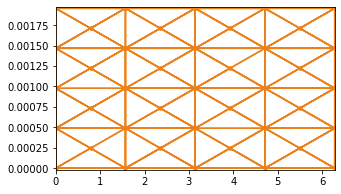

In [4]:
from ddgclib._plotting import *



refinement = 2
# TODO: Explain plane projection
# Explain how to project to other surfaces
# Exlain here projectio nto catenoid
domain = [(0.0, 2 * np.pi),  # u
          (0, length)  # v
              ]
HC_plane = Complex(2, domain)
HC_plane.triangulate()
for i in range(refinement):
    HC_plane.refine_all()

HC_plane.plot_complex(surface_plot=False, surface_field_plot=False)

0.001955767409633757


D:\02_Masterarbeit\03_Python\ddgclib\_complex.py:2830: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  self.fig_complex.show()


(<Figure size 360x216 with 1 Axes>, <AxesSubplot:>, None, None)

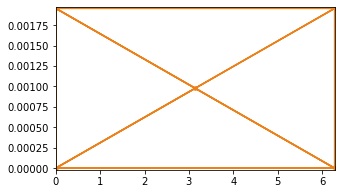

In [5]:
from ddgclib._plotting import *

print(length)
# TODO: Explain plane projection
# Explain how to project to other surfaces
# Exlain here projectio nto catenoid
domain = [(0.0, 2 * np.pi),  # u
          (0, length)  # v
              ]
HC_plane = Complex(2, domain)
HC_plane.triangulate()


HC_plane.plot_complex(surface_plot=False, surface_field_plot=False)

"\n\n    def plot_complex(self, show=True, directed=True, complex_plot=True,\n                     contour_plot=True, surface_plot=True,\n                     surface_field_plot=True, minimiser_points=True,\n                     point_color='do', line_color='do',\n                     complex_color_f='lo', complex_color_e='do', pointsize=7,\n                     no_grids=False, save_fig=True, strpath=None,\n                     plot_path='fig/', fig_name='complex.pdf', arrow_width=None,\n                     fig_surface=None, ax_surface=None, fig_complex=None,\n                     ax_complex=None\n                     ):\n                     "

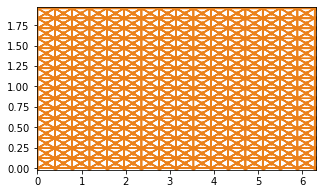

In [17]:
from ddgclib._plotting import *


# TODO: Explain plane projection
# Explain how to project to other surfaces
# Exlain here projectio nto catenoid
domain = [(0.0, 2 * np.pi),  # u
          (0, length*1e3)  # v
              ]
HC_plane = Complex(2, domain)
HC_plane.triangulate()
for i in range(4):
    HC_plane.refine_all()

#HC_plane.plot_complex(surface_plot=False, surface_field_plot=False)
HC_plane.plot_complex(surface_plot=False, surface_field_plot=False,fig_name='Refinement=4.png',save_fig=True,pointsize=7, contour_plot = False, line_color='do')
'''

    def plot_complex(self, show=True, directed=True, complex_plot=True,
                     contour_plot=True, surface_plot=True,
                     surface_field_plot=True, minimiser_points=True,
                     point_color='do', line_color='do',
                     complex_color_f='lo', complex_color_e='do', pointsize=7,
                     no_grids=False, save_fig=True, strpath=None,
                     plot_path='fig/', fig_name='complex.pdf', arrow_width=None,
                     fig_surface=None, ax_surface=None, fig_complex=None,
                     ax_complex=None
                     ):
                     '''

D:\02_Masterarbeit\03_Python\ddgclib\_complex.py:2830: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  self.fig_complex.show()


(<Figure size 432x288 with 1 Axes>, <Axes3D:>, None, None)

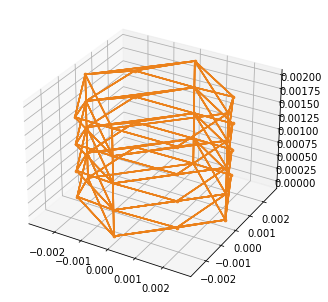

In [11]:
HC.plot_complex(surface_plot=False, surface_field_plot=False)

In [32]:
x_dummy = []
y_dummy = []

for v in HC_plane.V:
    print(v.x)
    x_dummy.append(v.x[0])
    y_dummy.append(v.x[1])

(0.0, 0)
(6.283185307179586, 1.9557674096337567)
(6.283185307179586, 0)
(0.0, 1.9557674096337567)
(3.141592653589793, 0.9778837048168784)
(3.141592653589793, 0.0)
(0.0, 0.9778837048168784)
(6.283185307179586, 0.9778837048168784)
(3.141592653589793, 1.9557674096337567)
(4.71238898038469, 1.4668255572253175)
(1.5707963267948966, 1.4668255572253175)
(4.71238898038469, 0.4889418524084392)
(1.5707963267948966, 0.4889418524084392)
(4.71238898038469, 0.9778837048168784)
(3.141592653589793, 1.4668255572253175)
(6.283185307179586, 1.4668255572253175)
(4.71238898038469, 1.9557674096337567)
(5.497787143782138, 1.222354631021098)
(5.497787143782138, 1.7112964834295372)
(3.9269908169872414, 1.222354631021098)
(3.9269908169872414, 1.7112964834295372)
(1.5707963267948966, 0.9778837048168784)
(0.0, 1.4668255572253175)
(1.5707963267948966, 1.9557674096337567)
(0.7853981633974483, 1.222354631021098)
(2.356194490192345, 1.222354631021098)
(0.7853981633974483, 1.7112964834295372)
(2.356194490192345, 1.711

In [9]:
for v in HC_plane.V:
    print(v.nn)

{<ddgclib._vertex.VertexCube object at 0x000001E498DE8B80>, <ddgclib._vertex.VertexCube object at 0x000001E498DE1310>, <ddgclib._vertex.VertexCube object at 0x000001E498DE1430>}
{<ddgclib._vertex.VertexCube object at 0x000001E498DF3130>, <ddgclib._vertex.VertexCube object at 0x000001E498DF32E0>, <ddgclib._vertex.VertexCube object at 0x000001E498DF31C0>}
{<ddgclib._vertex.VertexCube object at 0x000001E498DEDD00>, <ddgclib._vertex.VertexCube object at 0x000001E498DE85E0>, <ddgclib._vertex.VertexCube object at 0x000001E498DE8640>}
{<ddgclib._vertex.VertexCube object at 0x000001E498DED460>, <ddgclib._vertex.VertexCube object at 0x000001E498DED2B0>, <ddgclib._vertex.VertexCube object at 0x000001E498DED340>}
{<ddgclib._vertex.VertexCube object at 0x000001E498DB0850>, <ddgclib._vertex.VertexCube object at 0x000001E498DF3610>, <ddgclib._vertex.VertexCube object at 0x000001E498DE81F0>, <ddgclib._vertex.VertexCube object at 0x000001E498DF3A90>, <ddgclib._vertex.VertexCube object at 0x000001E498D

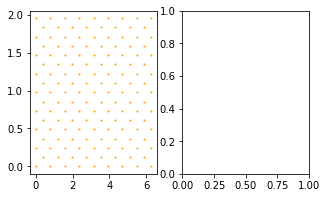

In [41]:
import matplotlib.pyplot as plt
fig4, ax4 = plot.subplots(nrows=1, ncols=2, figsize=(5, 3))

ax4[0].plot(x_dummy,y_dummy , color = 'orange', linewidth = 0, markersize = 1,marker = 'o', label = 'ref. = 3')

AttributeError: <class 'ddgclib._vertex.VertexCube'> object has no attribute 'f'

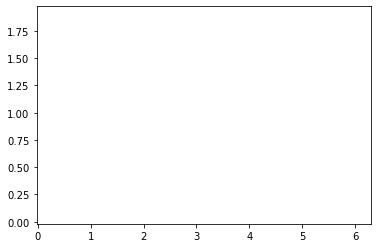

In [14]:
import pylab
import functools

#H = Complex(2, domain=[(0, 10)], sfield=func)
H = copy.copy(HC_plane)
# As an example we'll use the built in triangulation to generate vertices
H.triangulate()
H.split_generation()

# Plot the complex
H.plot_complex()

# You can add any sort of custom drawings to the Axes classes of theplots
H.ax_complex.plot(0.25, 0.25, '.', color='k', markersize=10)
H.ax_surface.scatter(0.25, 0.25, 0.25, '.', color='k', s=10)

# Show the final plot
pylab.show()

In [ ]:
'